In [1]:
%run config.ipynb
import seaborn as sns
import featuretools as ft

# Reading Datasets

In [2]:
# business = pd.read_json("data/yelp_academic_dataset_business.json", lines=True)
# checkin = pd.read_json("data/yelp_academic_dataset_checkin.json", lines=True)

# choose a version to read the review file (json file is the original one and the csv file is the 0.01 sampled version)
# review = pd.read_csv("data/yelp_academic_dataset_sample_review.csv")
# review = pd.read_csv("data/yelp_academic_dataset_sample005_review.csv")
# review = pd.read_json("data/yelp_academic_dataset_review.json", lines=True)
# tip = pd.read_json("data/yelp_academic_dataset_tip.json", lines=True)
# user = pd.read_json("data/yelp_academic_dataset_user.json", lines=True)

# OR The filtered dataset 
df = pd.read_csv("data/yelp_academic_dataset_sample0125_filter.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002050 entries, 0 to 1002049
Data columns (total 17 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   review_id                   1002050 non-null  object 
 1   user_id                     1002050 non-null  object 
 2   business_id                 1002050 non-null  object 
 3   review_stars                1002050 non-null  int64  
 4   review_text                 1002050 non-null  object 
 5   user_review_count           1002050 non-null  int64  
 6   user_elite                  1002050 non-null  int64  
 7   user_friends                1002050 non-null  object 
 8   user_fans                   1002050 non-null  int64  
 9   user_average_stars          1002050 non-null  float64
 10  user_total_compliments      1002050 non-null  int64  
 11  business_name               1002050 non-null  object 
 12  business_categories         1002050 non-null  object 
 1

# Visualizing

In [3]:
review_freq = df.groupby(['review_stars'], as_index=False).size()

[Text(0, 0.5, '# reviews'), Text(0.5, 1.0, '# reviews in each star')]

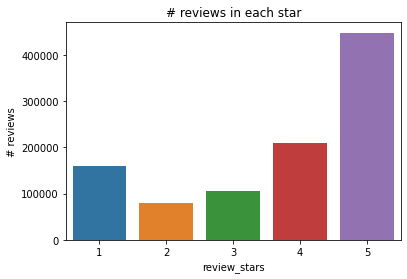

In [4]:
sns.barplot(x="review_stars", y="size", data=review_freq).set(ylabel="# reviews", title="# reviews in each star")

brief summary: most reviews have higher stars

[Text(0.5, 1.0, '# reviews provided by the order of user popular')]

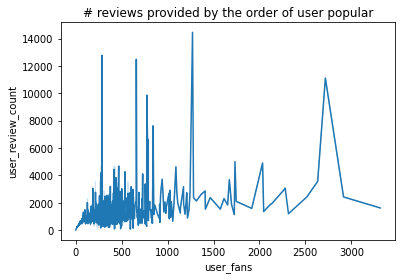

In [5]:
sns.lineplot(x="user_fans", y="user_review_count", data=df).set(title="# reviews provided by the order of user popular")

brief summary: Not a very clear trend here, so logarithm needs to be performed

[Text(0.5, 1.0, '# reviews provided by the logarithm order of user popular')]

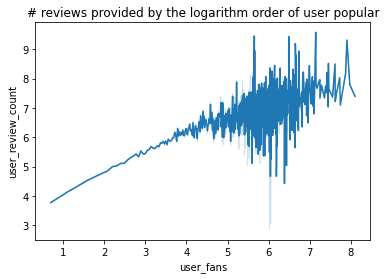

In [6]:
sns.lineplot(x="user_fans", y="user_review_count", data=np.log(df[["user_fans", "user_review_count"]])).set(title="# reviews provided by the logarithm order of user popular")

brief summary: Looks nicer. A shape of heavy Homoscedasticity from 4 to 8 with high variance

[Text(0, 0.5, '# useful votes'),
 Text(0.5, 1.0, 'comparison between # useful and # cool by given stars')]

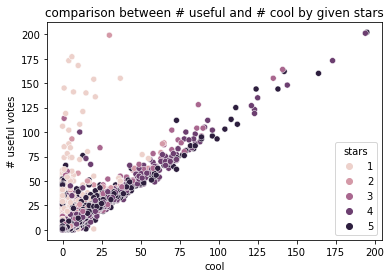

In [7]:
sns.scatterplot(x="cool", y="useful", hue="stars", data=review).set(ylabel="# useful votes", title="comparison between # useful and # cool by given stars")

brief summary: Star5 shows a linear trend between # useful votes and # cool votes \
               Star1 shows nearly a vertically line. (Guess: only depend on # useful votes)

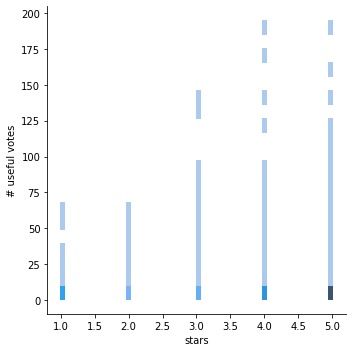

In [33]:
sns.displot(x="stars", y="cool", data=review).set(ylabel="# useful votes", title="")

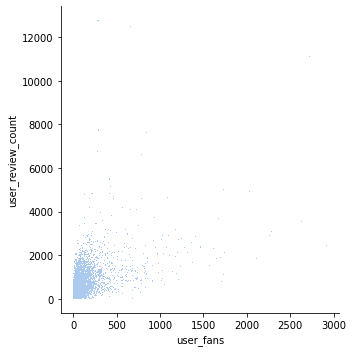

In [8]:
sns.displot(x="user_fans", y="user_review_count", data=df)

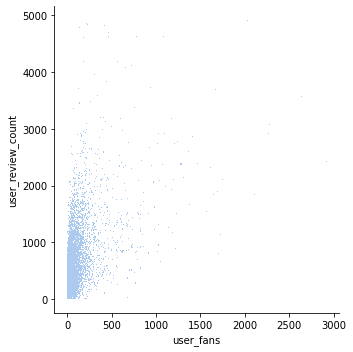

In [10]:
sns.displot(x="user_fans", y="user_review_count", data=df[df["user_review_count"] < 5000])

[Text(0.5, 1.0, 'comparison between # cool votes and compliment_cool votes')]

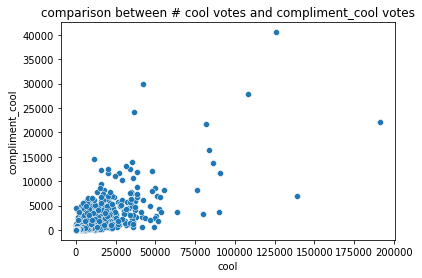

In [31]:
sns.scatterplot(x="cool", y="compliment_cool", data=user).set(title="comparison between # cool votes and compliment_cool votes")

brief summary: show a shape of Heteroskedasticity

[Text(0.5, 1.0, 'comparison between # reviews count and # friends the user have')]

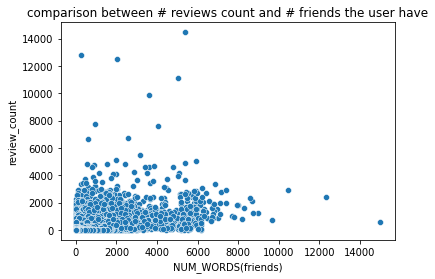

In [36]:
sns.scatterplot(x="NUM_WORDS(friends)", y="review_count", data=user_features).set(title="comparison between # reviews count and # friends the user have")

[Text(0.5, 0, 'year (20xx)'), Text(0.5, 1.0, '# users registered each year')]

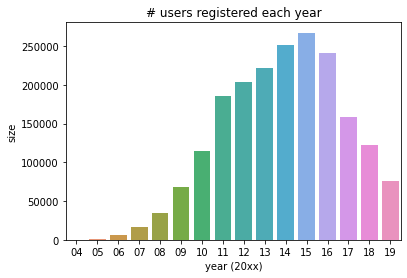

In [48]:
nusers_year = user_features.groupby(['YEAR(yelping_since)'], as_index=False).size()
nusers_year["YEAR(yelping_since)"] = nusers_year["YEAR(yelping_since)"].apply(lambda x : str(x)[2:])
sns.barplot(x="YEAR(yelping_since)", y="size", data=nusers_year).set(xlabel = "year (20xx)", title="# users registered each year")

brief summary: kind of Gaussian Distribution. A maxima happened in 2015. In 2019, fewever users seemed to register but that might not be a problem as there exists enough existing users.

[Text(0.5, 1.0, '# reviews made in each day')]

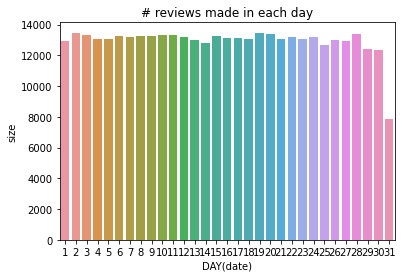

In [13]:
nreviews_day = review_features.groupby(['DAY(date)'], as_index=False).size()
sns.barplot(x="DAY(date)", y="size", data=nreviews_day).set(title="# reviews made in each day")

brief summary: Each day shows an even size. 31 has a lower size as not every month has a 31 day.

[Text(0.5, 1.0, '# reviews made in each weekday')]

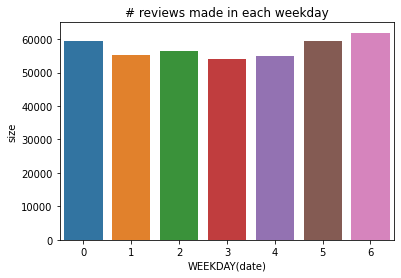

In [21]:
nreviews_weekday = review_features.groupby(['WEEKDAY(date)'], as_index=False).size()
sns.barplot(x="WEEKDAY(date)", y="size", data=nreviews_weekday).set(title="# reviews made in each weekday")

[Text(0.5, 1.0, '# reviews made in each month')]

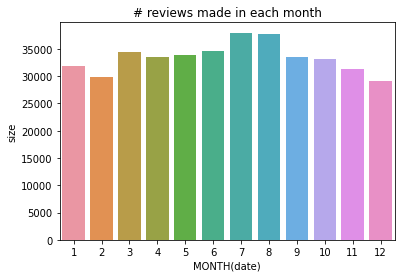

In [22]:
nreviews_month = review_features.groupby(['MONTH(date)'], as_index=False).size()
sns.barplot(x="MONTH(date)", y="size", data=nreviews_month).set(title="# reviews made in each month")

[Text(0.5, 1.0, 'comparison between # words in review and stars given')]

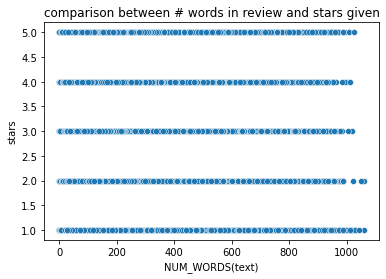

In [15]:
sns.scatterplot(x="NUM_WORDS(text)", y="stars", data=review_features).set(title="comparison between # words in review and stars given")